## **Cats-Dogs Detection**

**Benedictus Bayu Pramudhito**

Sebelumnya sudah dicoba tuning hyperparameter dengan memakai optimizer Adamax dan juga SGD dengan learning rate 0.0001 dan nesterov = True. Namun kedua model ini memberikan nilai akurasi yang buruk yakni berkisar di 0.5 bahkan loss pada model Adamax bernilai negatif. Model terbaik diperoleh dengan Optimizer RMSProp dengan learning rate 0.0001 dan momentum 0.9.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/My\ Drive/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

!rm /content/cats-dogs.zip

In [4]:
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adagrad, Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Image Segmentation**

In [5]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
dataset_dir = '/content/'

train_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_augmented_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [7]:
#Learning rate = 0.01
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = RMSprop(learning_rate=0.0001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [8]:
history_deep_model = model.fit_generator(train_augmented_iterator, steps_per_epoch=len(train_augmented_iterator), validation_data=test_augmented_iterator, validation_steps=len(test_augmented_iterator), epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
100/100 [==============================] - 157s 2s/step - loss: 0.9476 - accuracy: 0.5890 - val_loss: 0.5961 - val_accuracy: 0.6674
Epoch 2/50
100/100 [==============================] - 151s 2s/step - loss: 0.5721 - accuracy: 0.6971 - val_loss: 0.5216 - val_accuracy: 0.7380
Epoch 3/50
100/100 [==============================] - 148s 1s/step - loss: 0.5217 - accuracy: 0.7400 - val_loss: 0.4921 - val_accuracy: 0.7531
Epoch 4/50
100/100 [==============================] - 150s 1s/step - loss: 0.4892 - accuracy: 0.7655 - val_loss: 0.4597 - val_accuracy: 0.7766
Epoch 5/50
100/100 [==============================] - 149s 1s/step - loss: 0.4603 - accuracy: 0.7805 - val_loss: 0.4185 - val_accuracy: 0.8046
Epoch 6/50
100/100 [==============================] - 147s 1s/step - loss: 0.4516 - accuracy: 0.7896 - val_loss: 0.4188 - val_accuracy: 0.8095
Epoch 7/50
100/100 [==============================] - 147s 1s/step

In [10]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [14]:
import pandas as pd

history_dataframe = pd.DataFrame(history_deep_model.history)
history_dataframe['epoch'] = history_deep_model.epoch
history_dataframe

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.947643,0.588987,0.596058,0.667407,0
1,0.572074,0.697074,0.521553,0.738011,1
2,0.521695,0.739980,0.492051,0.753108,2
3,0.489236,0.765472,0.459737,0.776643,3
4,0.460256,0.780532,0.418451,0.804618,4
5,0.451644,0.789552,0.418835,0.809503,5
6,0.427562,0.805396,0.471136,0.774867,6
7,0.407920,0.817162,0.418548,0.804174,7
8,0.393523,0.820300,0.404676,0.816163,8
9,0.382904,0.826026,0.406405,0.813499,9


In [18]:
loss, accuracy = model.evaluate(test_augmented_iterator, verbose=2)

print('Test accuracy', accuracy)
print('Test Loss', loss)

18/18 - 22s - loss: 0.2949 - accuracy: 0.8841
Test accuracy 0.884103000164032
Test Loss 0.29485538601875305


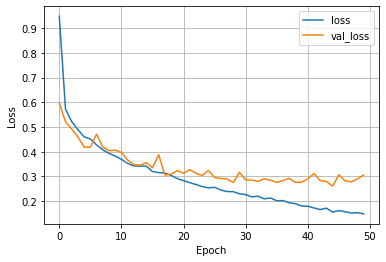

In [12]:
import matplotlib.pyplot as plt

plot_loss(history_deep_model)

**Kita ingin mencari loss yang terendah, loss ini terhadap val_lossnya**

Berdasarkan grafik epoch terhadap loss pada model CNN dengan deeper layer dan image augmentation, terlihat bahwa garis loss nya terus menurun sementara garis val_loss nya menurun namun mulai stabil setelah epoch sekitaran 28. Terlihat juga bahwa perbedaan jarak antara loss dan val_lossnya dengan 50 epoch ini tidak besar yang berarti model yang kita buat ini tidak overfit. Oleh karena itu, nilai val_loss terendah diperoleh saat epochnya sekitar 45, dimana diperoleh **val_loss: 0.2611** dan **val_accuracy: 0.8961**